<div dir="rtl">

## الف) 

</div>


<div dir="rtl">

فایل داده‌ شد را روی کولب لود می‌کنیم. لطفا متغیر 
path
را به صورت مورد نیاز تغییر دهید. 

</div>


In [2]:
from google.colab import drive
drive.mount('/mount')

Mounted at /mount


In [3]:
cd /mount/My Drive/Colab Notebooks/MDA/HW1

/mount/My Drive/Colab Notebooks/MDA/HW1


In [4]:
ls

 IMDB-Movie-Data.csv   q1.ipynb  'SUT - Data Mining Spark Exercise.ipynb'


In [5]:
import pandas as pd
path = 'IMDB-Movie-Data.csv'
df = pd.read_csv(path)
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<div dir="rtl">

## ب)

</div>


<div dir="rtl">

تمام ژانر‌های این دیتاست با گرفتن مقادیر یکتا از ستون ژانرها پس از جدا کردن با ویرگول به دست می‌آید.

</div>


In [6]:
sample = df.head()
geners = pd.Series(df['Genre'].str.split(',').sum()).unique()
geners

array(['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller',
       'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music',
       'Biography', 'Romance', 'History', 'Crime', 'Western', 'War',
       'Musical', 'Sport'], dtype=object)

<div dir="rtl">

در هر ژانر چند فیلم وجود دارد: 

</div>


In [7]:
deformed_df = df.reindex(df.index.repeat(df.Genre.str.split(',').str.len()))
deformed_df['Genre'] = df.Genre.str.split(',').sum()
deformed_df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
0,1,Guardians of the Galaxy,Adventure,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
0,1,Guardians of the Galaxy,Sci-Fi,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,Adventure,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
1,2,Prometheus,Mystery,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [8]:
display(deformed_df.groupby('Genre')['Revenue (Millions)'].size())

Genre
Action       303
Adventure    259
Animation     49
Biography     81
Comedy       279
Crime        150
Drama        513
Family        51
Fantasy      101
History       29
Horror       119
Music         16
Musical        5
Mystery      106
Romance      141
Sci-Fi       120
Sport         18
Thriller     195
War           13
Western        7
Name: Revenue (Millions), dtype: int64

<div dir="rtl">

میانگین درآمد هر ژانر:  

</div>


Note that we have NaN values, so simply dividing sum by size doesn't give us mean. But mean function handles this for us.

In [9]:
display(deformed_df.groupby('Genre')['Revenue (Millions)'].mean())

Genre
Action       124.494476
Adventure    154.177024
Animation    191.223404
Biography     55.801600
Comedy        75.750784
Crime         61.804769
Drama         49.844205
Family       126.175714
Fantasy      131.850108
History       52.923846
Horror        36.705269
Music         47.070000
Musical       81.642000
Mystery       54.627640
Romance       42.503023
Sci-Fi       135.552545
Sport         65.042500
Thriller      69.577255
War           53.433000
Western      111.824000
Name: Revenue (Millions), dtype: float64

<div dir="rtl">

## ج)

</div>

<div dir="rtl">

تمام فیلم‌های بین سال ۲۰۰۶ و ۲۰۱۶ را می‌گیریم.

</div>

In [11]:
df3 = df[df.Year.between(2006,2016)]
df3.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<div dir="rtl">

ابتدا 
df
را روی ستون بازیگر باز می‌کنیم. یعنی به ازای هر بازیگر و فیلم یک ردیف قرار می‌دهیم. 

</div>


In [12]:
deformed_df3 = df.reindex(df.index.repeat(df.Actors.str.split(',').str.len()))
# deformed_df3['Actor'] = pd.Series(df3.Actors.str.split(',').sum()).str.strip()
deformed_df3['Actor'] = df3.Actors.str.split(',').sum()
# deformed_df3 = deformed_df3.drop('Actors', axis=1)
deformed_df3 = deformed_df3[['Actor','Title']]
deformed_df3.Actor = deformed_df3.Actor.str.strip()
deformed_df3.head(10)

,Actor,Title
0,Chris Pratt,Guardians of the Galaxy
0,Vin Diesel,Guardians of the Galaxy
0,Bradley Cooper,Guardians of the Galaxy
0,Zoe Saldana,Guardians of the Galaxy
1,Noomi Rapace,Prometheus
1,Logan Marshall-Green,Prometheus
1,Michael Fassbender,Prometheus
1,Charlize Theron,Prometheus
2,James McAvoy,Split
2,Anya Taylor-Joy,Split


<div dir="rtl">

سپس این 
df
را با ستون 
title
روی خودش
join 
می‌کنیم.  در این مرحله دقت می کنیم که بازیگر چپ و راست با هم یکی نباشند. 

</div>

In [ ]:
deformed_df3 = pd.merge(deformed_df3,deformed_df3, on='Title', suffixes = ('_left','_right'))
deformed_df3 = deformed_df3[deformed_df3.Actor_left != deformed_df3.Actor_right]
deformed_df3

,Actor_left,Title,Actor_right
1,Chris Pratt,Guardians of the Galaxy,Vin Diesel
2,Chris Pratt,Guardians of the Galaxy,Bradley Cooper
3,Chris Pratt,Guardians of the Galaxy,Zoe Saldana
4,Vin Diesel,Guardians of the Galaxy,Chris Pratt
6,Vin Diesel,Guardians of the Galaxy,Bradley Cooper
...,...,...,...
16018,Robbie Amell,Nine Lives,Jennifer Garner
16020,Robbie Amell,Nine Lives,Cheryl Hines
16021,Cheryl Hines,Nine Lives,Kevin Spacey
16022,Cheryl Hines,Nine Lives,Jennifer Garner


<div dir="rtl">

برای این که داده‌های تکراری نداشته باشیم، اگر دو ردیف با دو بازیگر یکسان و فیلم یکسان وجود داشته باشد، یکی از ردیف‌ها را حذف می‌کنیم. 

</div>


In [ ]:
deformed_df3[['Actor_left', 'Actor_right']] = np.sort(deformed_df3[['Actor_left', 'Actor_right']], axis=1)
# deformed_df3_temp = deformed_df3.groupby(by=['Actor_left','Title','Actor_right']).first()
deformed_df3 = deformed_df3.drop_duplicates(subset=['Actor_left', 'Title', 'Actor_right'], keep='first')
deformed_df3.head(15)

,Actor_left,Title,Actor_right
1,Chris Pratt,Guardians of the Galaxy,Vin Diesel
2,Bradley Cooper,Guardians of the Galaxy,Chris Pratt
3,Chris Pratt,Guardians of the Galaxy,Zoe Saldana
6,Bradley Cooper,Guardians of the Galaxy,Vin Diesel
7,Vin Diesel,Guardians of the Galaxy,Zoe Saldana
11,Bradley Cooper,Guardians of the Galaxy,Zoe Saldana
17,Logan Marshall-Green,Prometheus,Noomi Rapace
18,Michael Fassbender,Prometheus,Noomi Rapace
19,Charlize Theron,Prometheus,Noomi Rapace
22,Logan Marshall-Green,Prometheus,Michael Fassbender


<div dir="rtl">

حال بر روی هر ۲ بازیگر 
group by
می‌زنیم و تمامی فیلم‌های مشترک هر ۲ بازیگر را به دست می‌آوریم. 

</div>

In [ ]:
result3 = deformed_df3.groupby(by=['Actor_left','Actor_right'])['Title'].apply(list).reset_index(name='Titles')
result3 = result3[result3['Titles'].str.len()>3]
result3.head()

,Actor_left,Actor_right,Titles
152,Adam Sandler,Kevin James,"[Pixels, Grown Ups 2, Grown Ups, Hotel Transyl..."
2305,Daniel Radcliffe,Emma Watson,"[Harry Potter and the Deathly Hallows: Part 2,..."
2315,Daniel Radcliffe,Rupert Grint,"[Harry Potter and the Deathly Hallows: Part 2,..."
2953,Emma Watson,Rupert Grint,"[Harry Potter and the Deathly Hallows: Part 2,..."
3418,Helena Bonham Carter,Johnny Depp,"[Alice Through the Looking Glass, Alice in Won..."
3992,Jennifer Lawrence,Josh Hutcherson,"[The Hunger Games, The Hunger Games: Mockingja..."
3995,Jennifer Lawrence,Liam Hemsworth,"[The Hunger Games, The Hunger Games: Mockingja..."
4359,Josh Hutcherson,Liam Hemsworth,"[The Hunger Games, The Hunger Games: Mockingja..."
4653,Kristen Stewart,Robert Pattinson,"[Twilight, The Twilight Saga: Breaking Dawn - ..."
5421,Paul Walker,Vin Diesel,"[Furious Seven, Furious 6, Fast Five, Fast & F..."


<div dir="rtl">

در نهایت، بازیگران فیلم‌هایی که بیشتر از ۲ بازیگر یکسان دارند را با هم جمع می کنیم تا برای هر دسته از فیلم‌ها تمام بازیگران مشترک آن‌ها را به دست آوریم. 

</div>

In [ ]:
# result3['Actor_left'] + result3['Actor_right']
# result3['Titles'] = result3.Titles.str.join(',')
# result3['Actors'] = result3.apply(lambda x: [x['Actor_left'], x['Actor_right']], axis=1)
# result3.groupby(by='Titles')[['Titles','Actors']].agg('sum')['Actors']
# result3.groupby(by='Titles').agg('sum')['Actors']
result3.groupby(by='Titles').agg('sum')['Actors']

Titles
Alice Through the Looking Glass,Alice in Wonderland,Sweeney Todd: The Demon Barber of Fleet Street,Dark Shadows                                                                             [Helena Bonham Carter, Johnny Depp]
Furious Seven,Furious 6,Fast Five,Fast & Furious                                                                                                                                                      [Paul Walker, Vin Diesel]
Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Order of the Phoenix,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Half-Blood Prince    [Daniel Radcliffe, Emma Watson, Daniel Radclif...
Pixels,Grown Ups 2,Grown Ups,Hotel Transylvania 2                                                                                                                                                   [Adam Sandler, Kevin James]
The Hunger Games,The Hunger Games: Mockingjay - Part 2,The Hunger Games: Catching Fire,The Hunger

<div dir="rtl">

## د)

</div>

<div dir="rtl">

این قسمت تنها به یک فیلتر ساده مانند زیر نیاز دارد: 

</div>

In [ ]:
df4 = df[(df['Runtime (Minutes)']>110) & (7.5<df.Rating) & (df.Rating<8.5)]
# display(df4.head(5))
geners4 = pd.Series(df4.Genre.str.split(',').sum()).unique()
geners4

array(['Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Drama', 'Music',
       'Biography', 'History', 'Mystery', 'Fantasy', 'War', 'Crime',
       'Thriller', 'Western', 'Romance', 'Sport', 'Musical', 'Family',
       'Animation', 'Horror'], dtype=object)

<div dir="rtl">

## ه)

</div>

In [ ]:
deformed_df5 = df.reindex(df.index.repeat(df.Actors.str.split(',').str.len()))
deformed_df5['Actor'] = df.Actors.str.split(',').sum()
deformed_df5 = deformed_df5[['Actor','Title']]
deformed_df5.Actor = deformed_df5.Actor.str.strip()
deformed_df5.head(10)

,Actor,Title
0,Chris Pratt,Guardians of the Galaxy
0,Vin Diesel,Guardians of the Galaxy
0,Bradley Cooper,Guardians of the Galaxy
0,Zoe Saldana,Guardians of the Galaxy
1,Noomi Rapace,Prometheus
1,Logan Marshall-Green,Prometheus
1,Michael Fassbender,Prometheus
1,Charlize Theron,Prometheus
2,James McAvoy,Split
2,Anya Taylor-Joy,Split


In [ ]:
deformed_df5 = deformed_df5.groupby(by='Actor').size()
deformed_df5.head()

Actor
50 Cent          1
A.C. Peterson    1
AJ Michalka      1
Aamir Khan       4
Aaron Burns      2
dtype: int64

In [ ]:
deformed_df5.sort_values(ascending=False)

Actor
Mark Wahlberg         15
Hugh Jackman          14
Christian Bale        13
Brad Pitt             13
Channing Tatum        12
                      ..
Logan Miller           1
Logan Paul             1
Lori Petty             1
Lorraine Nicholson     1
50 Cent                1
Length: 1985, dtype: int64

<div dir="rtl">

## و)

</div>

<div dir="rtl">

با توجه به نمودار‌های پایین، می‌توان دید که هرچه 
votes
برای یک فیلم بالاتر باشد، احتمالا درآمد آن نیز بالاتر است. وجود خطی با شیب مثبت این ادعا را ثابت می‌کند. در حالتی که نمره‌ توسط منتقد‌ها باشد (یعنی 
rating
و
meta
) 
می‌توانید ببینید که دیگر چنین رابطه‌ای به این وضوح نمی‌توانیم ببینیم. 
</div>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


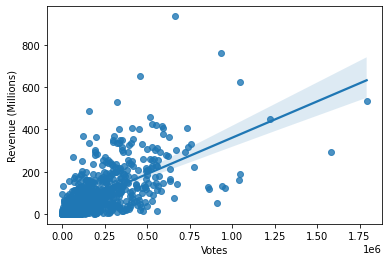

In [ ]:
import seaborn as sns

sns.regplot(df.Votes, df['Revenue (Millions)'])
# df.plot(x='Votes', y='Revenue (Millions)', kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


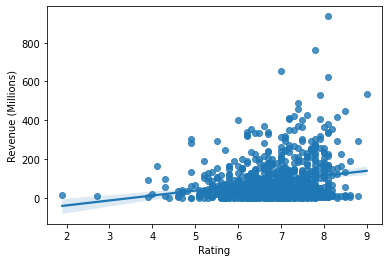

In [ ]:
sns.regplot(df.Rating, df['Revenue (Millions)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


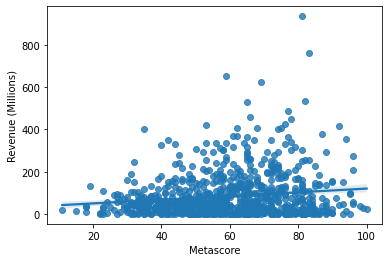

In [ ]:
sns.regplot(df.Metascore, df['Revenue (Millions)'])